In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [158]:
! gdown 1F7HWTJw5SnM9ymGAmaqP54nlyrvwWiM5

Downloading...
From: https://drive.google.com/uc?id=1F7HWTJw5SnM9ymGAmaqP54nlyrvwWiM5
To: /content/online_retail_II.csv
100% 94.9M/94.9M [00:00<00:00, 213MB/s]


In [159]:
data = pd.read_csv('online_retail_II.csv')

In [160]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [161]:
data.shape

(1067371, 8)

In [162]:
data[['Customer ID','Country']].drop_duplicates().groupby(['Country'])['Customer ID'].count().reset_index().sort_values('Customer ID', ascending=False)

,Country,Customer ID
40,United Kingdom,5410
15,Germany,107
14,France,95
34,Spain,41
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


In [163]:
most_country = ['United Kingdom','Germany','France','Spain']
new_data = data[data.Country.isin([i for i in most_country])]

In [164]:
new_data[new_data.Quantity<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
197,C489459,90200D,PINK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
198,C489459,90200B,BLACK SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
199,C489459,90200E,GREEN SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
200,C489459,90200C,BLUE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [165]:
# as you can see, some of orders are canceled, the we should drop them
new_data = new_data[new_data.Quantity>0]

In [166]:
new_data[new_data.Price<=0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
3161,489659,21350,NaN,230,2009-12-01 17:39:00,0.0,NaN,United Kingdom
3731,489781,84292,NaN,17,2009-12-02 11:45:00,0.0,NaN,United Kingdom
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
5904,489861,DOT,DOTCOM POSTAGE,1,2009-12-02 14:50:00,0.0,NaN,United Kingdom
6378,489882,35751C,NaN,12,2009-12-02 16:22:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1060795,581211,22142,check,14,2011-12-07 18:36:00,0.0,NaN,United Kingdom
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom


In [167]:
new_data = new_data[new_data.Price>0]

In [168]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992855 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      992855 non-null  object 
 1   StockCode    992855 non-null  object 
 2   Description  992855 non-null  object 
 3   Quantity     992855 non-null  int64  
 4   InvoiceDate  992855 non-null  object 
 5   Price        992855 non-null  float64
 6   Customer ID  759475 non-null  float64
 7   Country      992855 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 68.2+ MB


In [169]:
new_data = new_data.drop('Description',axis=1)

In [170]:
# a lot of customers are undefined, let's drop them 
new_data = new_data.dropna()

In [171]:
new_data

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...
1067366,581587,22899,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,3,2011-12-09 12:50:00,4.95,12680.0,France


In [172]:
print('First day of data',new_data.InvoiceDate.min())
print('Last day of data',new_data.InvoiceDate.max())

First day of data 2009-12-01 07:45:00
Last day of data 2011-12-09 12:50:00


Making LRFM Features 

In [173]:
# L: Length between first and last purches
# R: Recency measures the length of a time period since the last purchase
# F: Frequency is to count the number of purchases in a time period
# M: Monetary is to accumulate the amount of money spent in this time period

In [174]:
# L & R column
today = dt.date(2011,12,10)
lr_col = new_data[['Customer ID','InvoiceDate']]
lr_col['Length'] = pd.DatetimeIndex(lr_col['InvoiceDate']).date
lr_col['Recency'] = pd.DatetimeIndex(lr_col['InvoiceDate']).date
lr_col = lr_col.groupby('Customer ID').agg({'Length': lambda date: (date.max() - date.min()).days,
                                          'Recency': lambda date: (today - date.max()).days})
lr_col = lr_col.reset_index()

In [175]:
# F column
f_col = new_data[['Customer ID','Invoice']]
f_col = f_col.drop_duplicates().groupby('Customer ID',as_index=False)['Invoice'].count()
f_col.columns = ['Customer ID','Frequency']

In [176]:
# M column
new_data['TotalPrice'] = new_data.Quantity*new_data.Price
m_col = new_data[['Customer ID','TotalPrice']]
m_col = m_col.groupby('Customer ID',as_index=False)['TotalPrice'].sum()
m_col.columns = ['Customer ID','Monetary']

In [177]:
df = lr_col.merge(f_col,on='Customer ID')
df = df.merge(m_col,on='Customer ID')

In [178]:
df.head()

,Customer ID,Length,Recency,Frequency,Monetary
0,12346.0,400,326,12,77556.46
1,12354.0,0,233,1,1079.40
2,12413.0,336,67,4,999.45
3,12417.0,209,226,2,638.36
4,12419.0,28,386,2,503.01


In [179]:
# is it correct?
x = new_data[new_data['Customer ID']==12419.0]
print(x.iloc[-1,3])
recency = today - dt.date(2010,11,19)
print(recency)

2010-11-19 10:04:00
386 days, 0:00:00


In [180]:
x = new_data[new_data['Customer ID']==12419.0]
print(x.iloc[0,3])
print(x.iloc[-1,3])
len = (dt.date(2010,11,19)-dt.date(2010,10,22)).days
print(len)

2010-10-22 10:40:00
2010-11-19 10:04:00
28


In [181]:
x = new_data[new_data['Customer ID']==12419.0]
frequency = set(x.Invoice)
print(frequency)

{'533826', '528438'}


In [182]:
x = new_data[new_data['Customer ID']==12419.0]
monetary= x.TotalPrice.sum(axis=0)
print(monetary)

503.01


In [183]:
df.describe()

,Customer ID,Length,Recency,Frequency,Monetary
count,5591.000000,5591.000000,5591.000000,5591.000000,5591.000000
mean,15432.678591,275.713826,200.884278,6.277589,2793.569304
std,1656.615467,259.825754,209.251893,11.896912,11889.835197
min,12346.000000,0.000000,1.000000,1.000000,2.950000
25%,14009.500000,0.000000,26.000000,1.000000,341.700000
50%,15444.000000,225.000000,95.000000,3.000000,862.610000
75%,16862.500000,518.000000,380.000000,7.000000,2249.220000
max,18287.000000,738.000000,739.000000,336.000000,608821.650000


In [184]:
# Split based on Quantiles
quantiles = df.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'Customer ID': {0.25: 14009.5, 0.5: 15444.0, 0.75: 16862.5},
 'Length': {0.25: 0.0, 0.5: 225.0, 0.75: 518.0},
 'Recency': {0.25: 26.0, 0.5: 95.0, 0.75: 380.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 7.0},
 'Monetary': {0.25: 341.7, 0.5: 862.61, 0.75: 2249.2200000000003}}

In [185]:
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def LFMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [186]:
df['R'] = df['Recency'].apply(RScoring, args=('Recency',quantiles,))
df['F'] = df['Frequency'].apply(LFMScoring, args=('Frequency',quantiles,))
df['M'] = df['Monetary'].apply(LFMScoring, args=('Monetary',quantiles,))
df.head()

,Customer ID,Length,Recency,Frequency,Monetary,R,F,M
0,12346.0,400,326,12,77556.46,3,1,1
1,12354.0,0,233,1,1079.40,3,4,2
2,12413.0,336,67,4,999.45,2,2,2
3,12417.0,209,226,2,638.36,3,3,3
4,12419.0,28,386,2,503.01,4,3,3


In [187]:
df['RFMgroup'] = df['R'].map(str) + df['F'].map(str) +df['M'].map(str)
df['RFMscoring'] = df[['R','F','M']].sum(axis=1)

In [188]:
df.head()

,Customer ID,Length,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscoring
0,12346.0,400,326,12,77556.46,3,1,1,311,5
1,12354.0,0,233,1,1079.40,3,4,2,342,9
2,12413.0,336,67,4,999.45,2,2,2,222,6
3,12417.0,209,226,2,638.36,3,3,3,333,9
4,12419.0,28,386,2,503.01,4,3,3,433,10


In [189]:
Loyality = ['P','G','S','B']
df['Loyality'] = pd.qcut(df['RFMscoring'],q=4,labels=Loyality).values

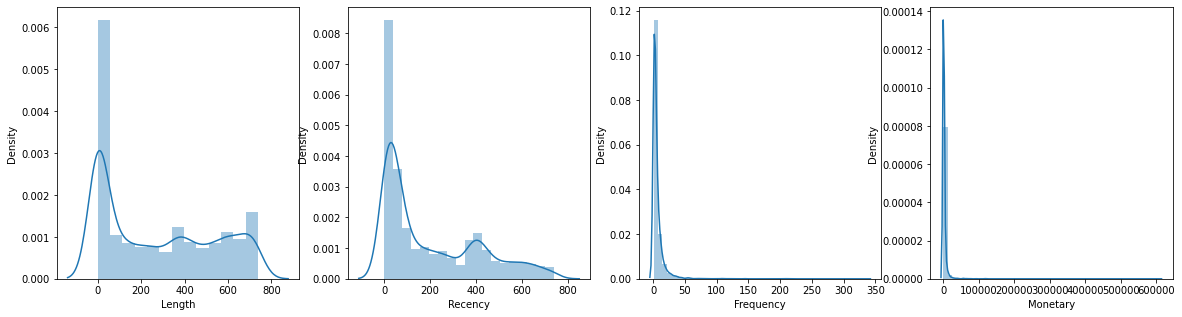

In [190]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.distplot(df['Length'])

plt.subplot(1,4,2)
sns.distplot(df['Recency'])

plt.subplot(1,4,3)
sns.distplot(df['Frequency'])

plt.subplot(1,4,4)
sns.distplot(df['Monetary']);

In [191]:
df_log = df[['Length']].apply(np.log1p, axis=1).round(3)
df_log[['Recency', 'Frequency', 'Monetary']] = df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

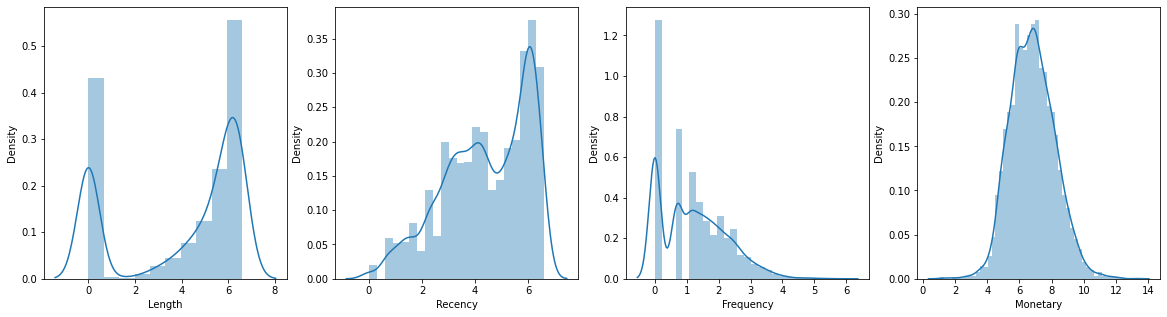

In [192]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.distplot(df_log['Length'])

plt.subplot(1,4,2)
sns.distplot(df_log['Recency'])

plt.subplot(1,4,3)
sns.distplot(df_log['Frequency'])

plt.subplot(1,4,4)
sns.distplot(df_log['Monetary']);

In [193]:
sc= StandardScaler()
df_sc = pd.DataFrame(sc.fit_transform(df_log))
df_sc.index = df_log.index
df_sc.columns = df_log.columns

In [194]:
df_sc.tail()

,Length,Recency,Frequency,Monetary
5586,0.917722,-1.899896,1.824870,0.795663
5587,-1.499439,1.029884,-1.172934,-0.488177
5588,-1.499439,1.296455,-1.172934,-0.544467
5589,0.555110,1.092460,-0.500829,0.256580
5590,0.838342,-0.413730,0.714392,1.102370


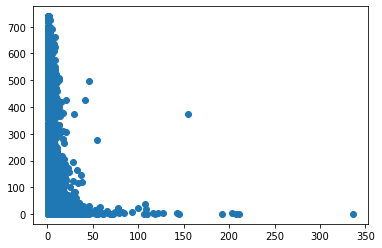

In [195]:
plt.scatter(x='Frequency',y='Recency',data=df)

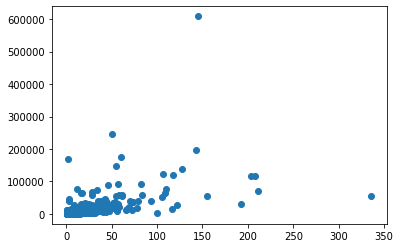

In [196]:
plt.scatter(x='Frequency',y='Monetary',data=df)

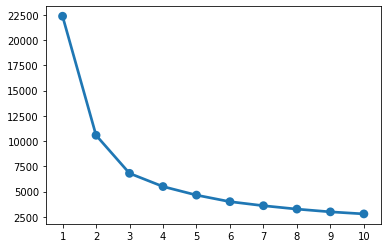

In [197]:
# kmeans to segment data
wcss = {}
for i in range(10):
  kmeans = KMeans(n_clusters=i+1, init='k-means++',max_iter=1000 ,random_state=20)
  kmeans.fit(df_sc)
  wcss[i+1] = kmeans.inertia_
sns.pointplot(list(wcss.keys()),list(wcss.values())) 

In [198]:
#best k=4
kmeans = KMeans(n_clusters=4,max_iter=1000,random_state=20,init='k-means++')
df['Cluster'] = kmeans.fit_predict(df_sc)

In [199]:
df[df['Cluster']==3]

,Customer ID,Length,Recency,Frequency,Monetary,R,F,M,RFMgroup,RFMscoring,Loyality,Cluster
2,12413.0,336,67,4,999.45,2,2,2,222,6,G,3
5,12421.0,490,16,6,1098.60,1,2,2,122,5,P,3
7,12427.0,350,22,3,1129.30,1,3,2,132,6,G,3
11,12445.0,398,23,2,434.98,1,3,3,133,7,G,3
17,12462.0,285,19,2,1189.59,1,3,2,132,6,G,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5573,18270.0,394,39,3,444.55,2,3,3,233,8,G,3
5576,18273.0,588,3,4,357.00,1,2,3,123,6,G,3
5579,18276.0,686,44,6,1656.52,2,2,2,222,6,G,3
5580,18277.0,436,59,5,1180.05,2,2,2,222,6,G,3


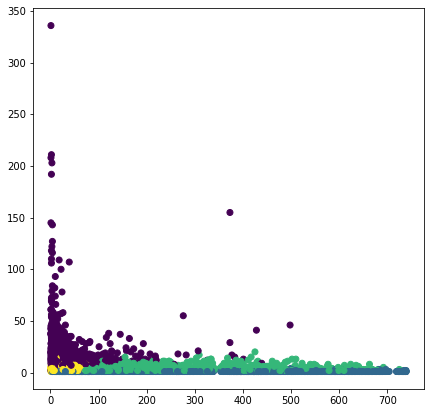

In [226]:
plt.figure(figsize=(7,7))
plt.scatter(x="Recency", y="Frequency",data=df,c = df['Cluster'])

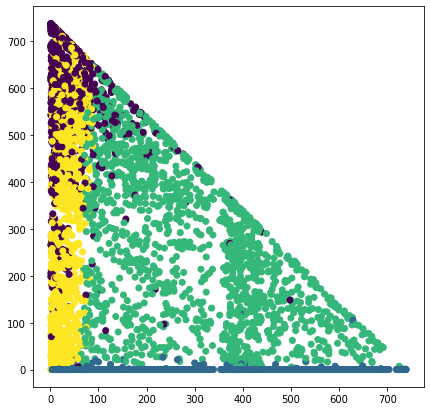

In [217]:
plt.figure(figsize=(7,7))
plt.scatter(x="Recency", y="Length",data=df,c = df['Cluster'])

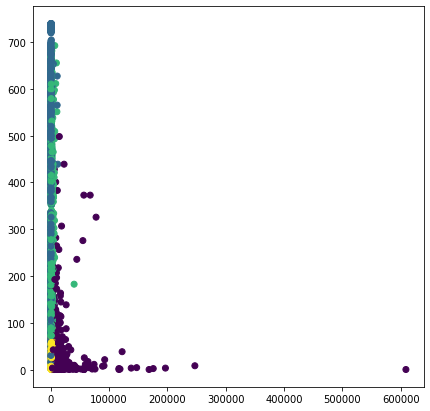

In [236]:
plt.figure(figsize=(7,7))
plt.scatter(x="Monetary", y="Recency",data=df,c = df['Cluster'])

In [ ]:
df_p = df.iloc[:,[1,2,3,4]].values

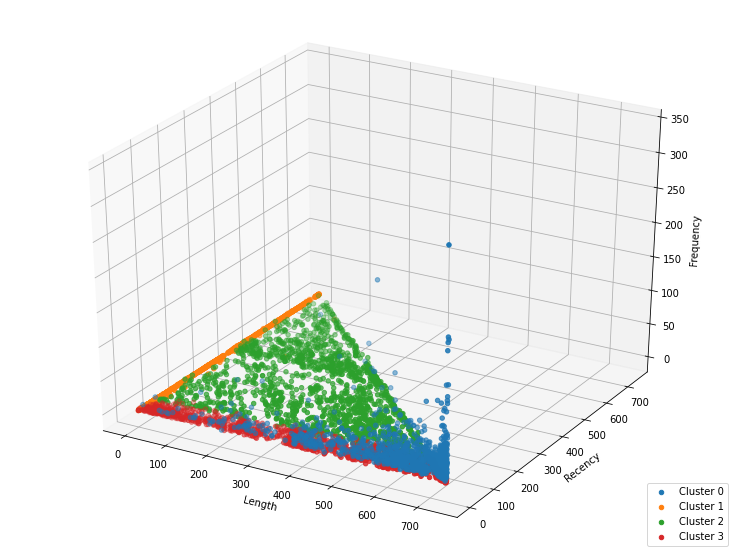

In [239]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (13,10))
ax = plt.axes(projection ="3d")
for clust in set(df.Cluster):
  ax.scatter3D(df_p[df.Cluster==clust,0], df_p[df.Cluster==clust,1],df_p[df.Cluster==clust,2],label=clust,s=20)
ax.set_xlabel('Length')
ax.set_ylabel('Recency')
ax.set_zlabel('Frequency')
plt.legend([f"Cluster {clust}" for clust in np.unique(df.Cluster)], loc ="lower right");